In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from nltk.corpus import stopwords
import re


In [2]:
data = pd.read_csv("Tweets_source_data.csv")

In [3]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


# first model

In [21]:
# https://www.kaggle.com/maniche04/sentiment-analysis-scikit

In [7]:
airwords = ['airline','air','plane','flight']
airlines = data['airline']

stop = stopwords.words('english')


In [10]:
def preprocessor(text):
    words = text.split()
    del words[0]
    words = [re.sub('[^0-9a-zA-Z]+', '', w.replace('#','').lower()) for w in words if not w.startswith('http') and not w.startswith('@')]
    finalwords = [w for w in words if (not w.isdigit() and w not in airwords and w not in airlines)]
    return ' '.join(finalwords)

In [11]:
#print(data.head(3))
data = data.loc[:14000,['text','airline_sentiment']]
data['text'] = data['text'].apply(preprocessor)

print(preprocessor("This is a tweet flight 979 and i'm happy #flight #travel @maniche04"))


is a tweet and im happy travel


In [12]:
test_data = data[4200:]
train_data = data[:9800]

print(train_data['text'][91:120])
#print(test_data['text'])

91     hi i did not get points on my elevate account ...
92     i like the tv and interesting video  just disa...
93     just landed in lax an hour after i should of b...
94                                     why is redirected
95     is it me or is your website down btw your new ...
96     i cant check in or add a bag your website isnt...
97      let scanned in passengers leave the than told...
98     what is your phone number i cant find who to c...
99     is anyone doing anything there today website i...
100    trying to add my boy prince to my ressie sf th...
101    why must a traveler miss a to late check a bag...
102                                  check out new music
103    hows a direct fllgtsfo have unexpected layover...
104    your no late bag check just lost you my busine...
105     amazing customer service again  raeann in sf ...
106    called your service line and was hung up on th...
107    your site is tripping im trying to check in an...
108    i was scheduled for sfo 

In [20]:
# extracting the feature list
from sklearn.feature_extraction.text import CountVectorizer
#count = CountVectorizer(ngram_range=(1,2))
#bag = count.fit_transform(s for s in data.loc[:,'text'])
#print(count.vocabulary_)

# tranforming the feature list
from sklearn.feature_extraction.text import TfidfTransformer
#tf_transformer = tf_transformer.fit_transform(bag)

# training
from sklearn.naive_bayes import MultinomialNB
#clf = MultinomialNB().fit(bag,data['airline_sentiment'])

# implement pipeline
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect',CountVectorizer(ngram_range=(4,5))),('tfidf',TfidfTransformer()),('clf',MultinomialNB())])
text_clf = text_clf.fit(train_data['text'],train_data['airline_sentiment'])

print('Test Accuracy: %.3f' % text_clf.score(test_data['text'], test_data['airline_sentiment']))

Test Accuracy: 0.832


# 2nd model

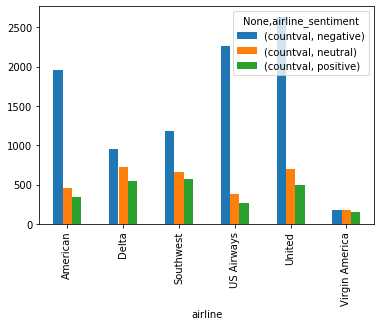

In [28]:
# Check the ratio of positive and negative tweets for each airline
data = pd.read_csv("Tweets_source_data.csv")

data['countval']=1
groupby_object=data[['airline','airline_sentiment','countval']].groupby(['airline','airline_sentiment']).aggregate(sum)
groupby_object.unstack(level=1).plot(kind='bar')
plt.show()
